In [1]:
%run ../../common/import_all.py

from common.setup_notebook import set_css_style, setup_matplotlib, config_ipython
config_ipython()
setup_matplotlib()
set_css_style()

ModuleNotFoundError: No module named 'numpy'

ModuleNotFoundError: No module named 'common.setup_notebook'

# Activation functions

This page is an overview of some of the common activation functions used in working with neural networks, each with its own advantaged and disadvantages that may make it more suitable to a problem than another. 

In the following we will give the generic form of the function when $x$ is called the input, bear in mind that the input for neural networks will be the weighted combination of inputs (with the weights/bias), so $\mathbf{w} \cdot \mathbf{x}$.

### On the non-linearity of activations

An activation is meant to be a non-linear function, because you want to destroy the linearity of the input (which is the combination of weights and inputs $\mathbf{w} \cdot \mathbf{x}$), in order to make the network learn interesting patterns. In fact, the all purpose of the activation is to insert non-linearity in the model; without it you would just end up having stacks of linear operations chained from layer to layer, so that the final output ends up being just a linear function of the very first input, which would essentially be like having a single layer and no hierarchy. This wouldn't allow for learning complex patterns.

## Heaviside

This is the activation function used by the perceptron neuron. It consists of a step function, so it is very simple and because of this is not suitable for a modern definition of learning as small changes in the input will produce big jumps in the output, limiting the functionality of the mechanism.

The following on sigmoid activations will clarify this point.

## Sigmoid

The sigmoid (or logistic) activation function is defined as

$$
f(x) = \sigma(x) = \frac{1}{1 + e^{-x}} \ .
$$

This function allows for small updates to the input to translate into small updates to the output, a thing that is difficult to achieve with a perceptron where due to the activation being a Heaviside step, small changes to the weights in input produce not-so-small output results. The logistic function looks like in the chart following here. A sigmoid activation, and by consequence a sigmoid neuron is a smoothening of the perceptron.

This is what makes learning feasible as you can tune the input iteratively to make for the output you want. A sigmoid neuron can be taught to learn in this very simple way: fine tuning the weights and the bias you can obtain the desired output. In the case of the perceptron, due to the step nature of the output function, this wouldn't be possible this way: you could of course tune the weights and the bias to make the neuron spit the desired output (and you also have just binary possibilities for it) but you have very limited in what you can do and in the way to do it.

The output of a sigmoid becomes that of a perceptron in the two extreme cases

* $\mathbf{w} \cdot \mathbf{x} + b \to \infty$, where $f(x) \to 1$ 
* $\mathbf{w} \cdot \mathbf{x} + b \to -\infty$, where $f(x) \to 0$ 

The chart following here displays the form of the sigmoid function. 

### Where it is used

The sigmoid makes for a very convenient activation for the last layer of a network in the case of a binary classification task, as (in much the same way as in for a logistic regression) it can be interpreted as the probability of the classification, being a continuous function between 0 and 1.

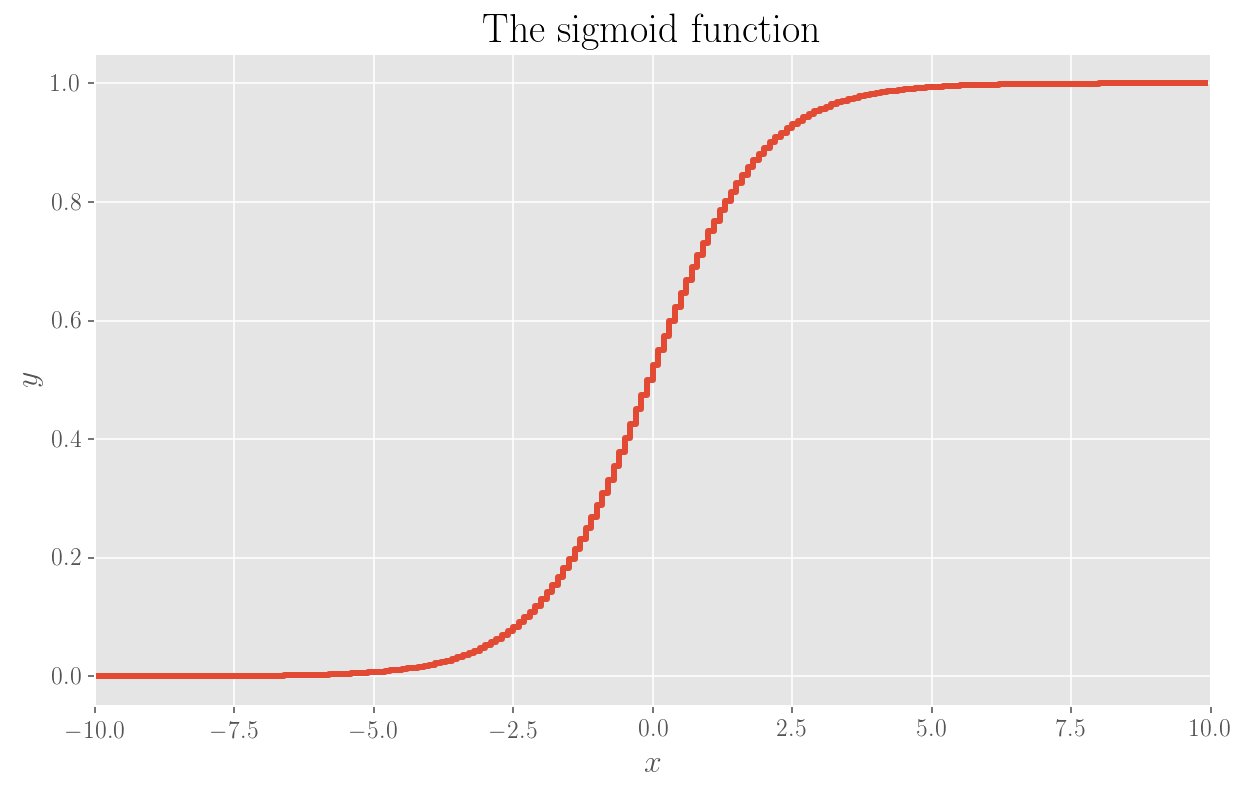

In [10]:
x = np.arange(-10, 10, 0.1)

plt.step(x, 1/(1 + np.exp(-x)))
plt.xlim(-10, 10)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('The sigmoid function')
plt.show();

## Hyperbolic tangent

The sigmoid is such that it maps large negative numbers to 0. This may cause the network to get stuck as gradients do not get updated.

An idea to correct this is to use the hyperbolic tangent function, which lies in [-1, 1] and maps negative values to negative values, preserving the sigmoidal shape. It also maps points near zero to points near zero. Another advantage is that its derivative will span a larger interval than that of the sigmoid, helping in the vanishing gradient problem, which is that situation when especially in a deep network different layers tend to learn at different speed due to the gradient getting smaller and smaller.                                                                        

In fact, the tanh is nothing more than a scaled sigmoid, can be written indeed as $f(x) = 2 \sigma(2x) - 1$. 

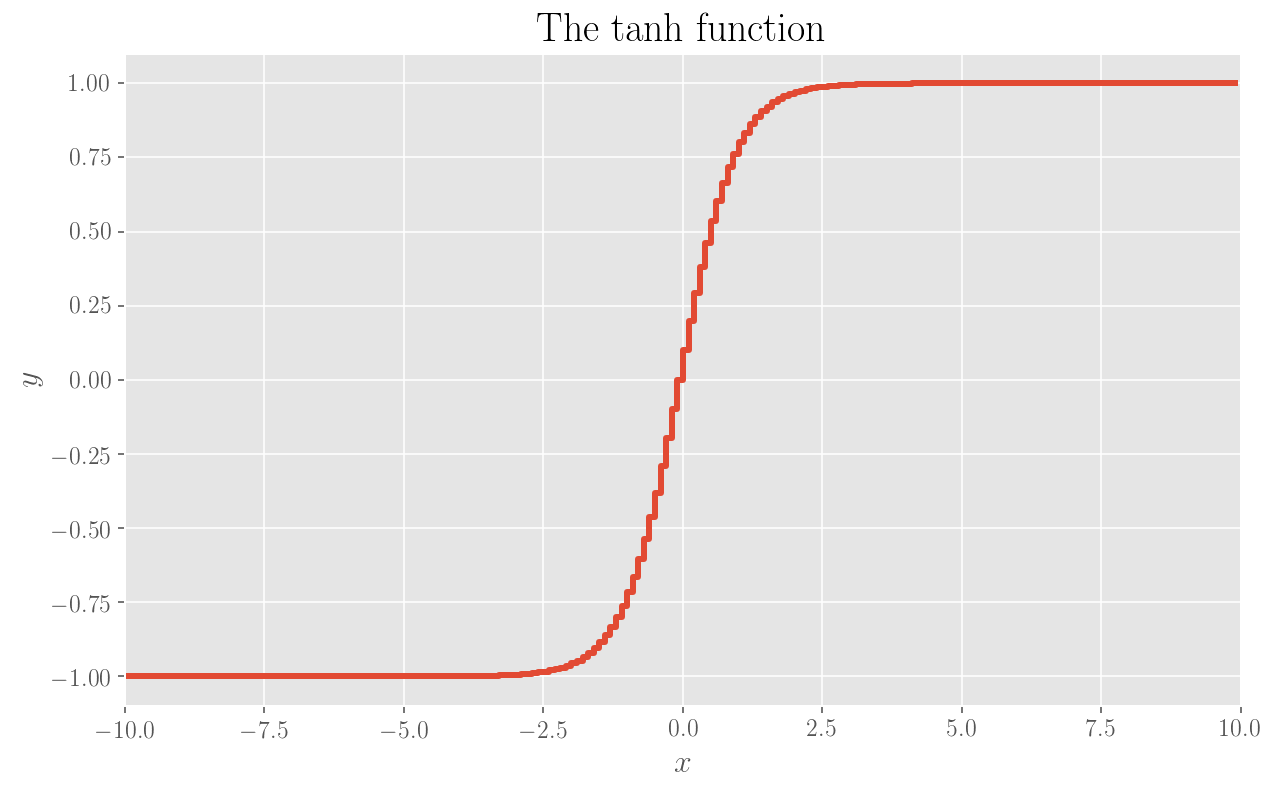

In [9]:
x = np.arange(-10, 10, 0.1)

plt.step(x, np.tanh(x))
plt.xlim(-10, 10)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('The tanh function')
plt.show();

## Softmax

The softmax is a generalisation of the sigmoid suitable to problems of multiclass classification. Its form is

$$
f(x_j) = \frac{e^{x_j}}{\sum_k^K e^{x_k}} \ ,
$$

where the vector $\mathbf{x} = (x_1, x_2, \ldots, x_K)$ is the vector of inputs and $x_j$ the element at hand. In a multiclass classification you would have $K$ output neurons for $K$ classes, the softmax provides the probability for each class.

## ReLU

The tanh still does not solve the vanishing gradient problem as in the near-flat parts of the curve gradients will be 0. The ReLU is unbounded for positive values and this makes it a very popular and effective choice today because in that part it does not lead to vanishing gradients; it is also quite cheap to compute, making the computation of gradients quite fast. It is typically used in the convolutional layers of CNNs. A rectifier linear unit, or ReLU in short, is simply the function

$$
f(x) = \max (0, x)
$$

In practice what it does is nullifying a negative argument, see the plot. 

However, relinquishing the unboundedness of the sigmoid-like functions means that activations can explode. Also, the part for negative inputs being 0 still means that neurons in that region will not fire. There are variations of the classical ReLU that tackle these weaknesses.

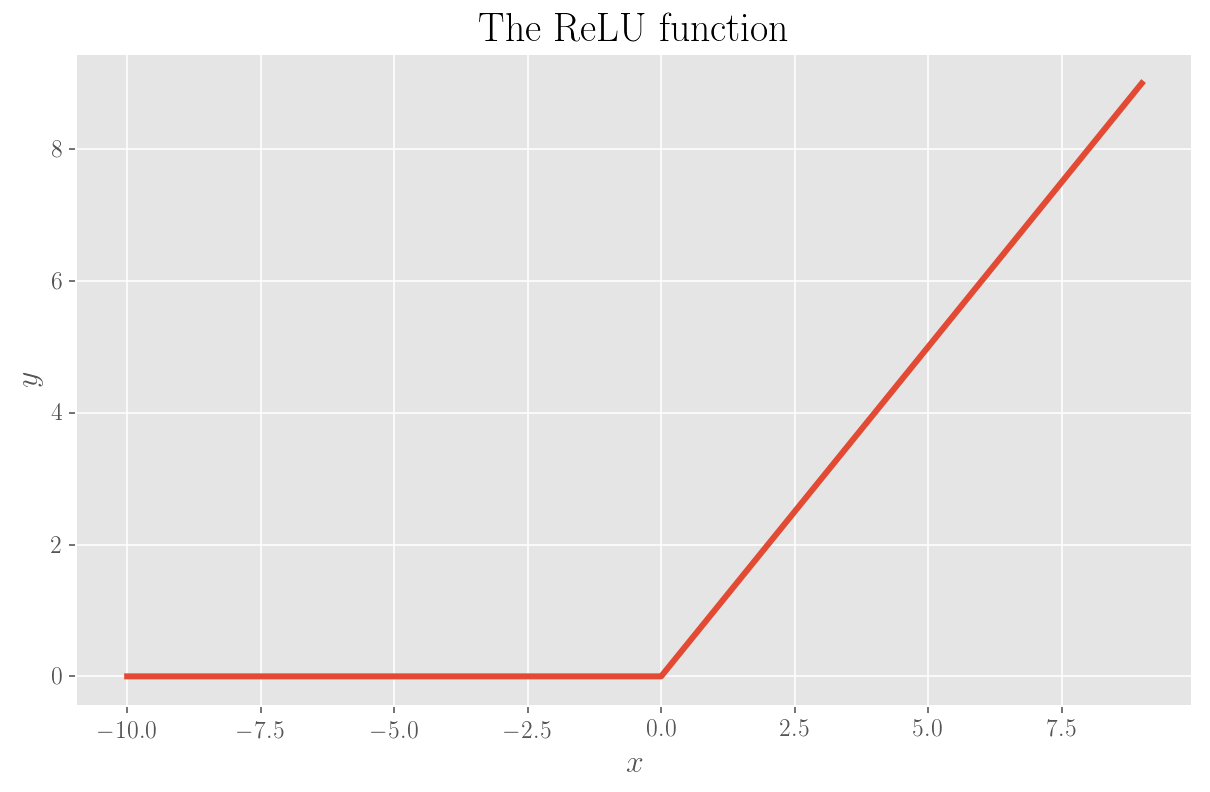

In [13]:
x = range(-10, 10, 1)
y = np.maximum(0, x)

plt.plot(x, y)
plt.xlabel('x')
plt.title('The ReLU function')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show();

## References

1. <a name="chollet"></a> F Chollet, **Deep Learning with Python**, Manning, 2017
2. [**Neural networks foundations explained: activation functions**](https://www.kdnuggets.com/2017/09/neural-network-foundations-explained-activation-function.html)
3. [**Understanding activation functions in neural networks**](https://medium.com/the-theory-of-everything/understanding-activation-functions-in-neural-networks-9491262884e0)